# **Star Type Classification**

**Descrizione del Dataset**

Il dataset `Star_Type_Classification`, disponibile su [Kaggle](https://www.kaggle.com/datasets/brsdincer/star-type-classification?resource=download), contiene informazioni fisiche e spettrali di 240 stelle, con l'obiettivo di predirne la classe evolutiva attraverso tecniche di machine learning. Ogni riga rappresenta una stella, descritta da caratteristiche fisiche osservabili o derivate e da una etichetta di classificazione.



**Variabili del dataset**

- `Temperature`: temperatura superficiale della stella, espressa in Kelvin; le stelle più calde tendono ad apparire blu, mentre le più fredde appaiono rosse.
    
- `L` ($L$/$L_{\odot}$): luminosità relativa della stella rispetto a quella del Sole. La luminosità solare media è $L_{\odot} = 3.828 \times 10^{26} \, \text{Watt}$.
    
- `R` ($R$/$R_{\odot}$): raggio relativo della stella rispetto a quello del Sole. Il raggio solare medio è $R_{\odot} = 6.9551 \times 10^8 \, \text{m}$.
    
- `A_M`: magnitudine assoluta della stella ($M_v$) che misura la sua luminosità intrinseca, ovvero come apparirebbe la stella se osservata da una distanza standard di $10$ parsec ($1\,pc = 3.26\,anni\,luce = 3.086 \times 10^{13} \, \text{km}$). La scala è logaritmica, quindi più basso è il valore, maggiore è la luminosità.
    
- `Color`: colore visibile predominante della stella, (es. `Blue`, `Yellowish White`, `Red`); è una variabile correlata alla temperatura della stella.
    
- `Spectral_Class`: classe spettrale della stella secondo la sequenza standard `O, B, A, F, G, K, M`, che riflette principalmente la temperatura superficiale. Le classi vanno dalla più calda ($O$) alla più fredda ($M$).
    
- `Type`: variabile target, rappresenta la classe evolutiva della stella. È una classificazione in 6 classi evolutive, codificate come segue:
 - $0$: `Red Dwarf`
 - $1$: `Brown Dwarf`
 - $2$: `White Dwarf`
 - $3$: `Main Sequence`
 - $4$: `Super Giant`
 - $5$: `Hyper Giant`


**Scopo dell'analisi**

L'obiettivo del progetto è testare diversi modelli di classificazione supervisionata in grado di prevedere la classe evolutiva della stella sulla base delle sue caratteristiche fisiche e spettrali. Le tecniche di machine learning possono includere modelli lineari, alberi decisionali e ensemble (come Random Forest), con opportuni preprocessamenti quali encoding di variabili categoriche e normalizzazione dei valori numerici.


**Analisi ulteriori**

Con le informazioni contenute nel dataset è possibile:
- riprodurre il grafico Hertzsprung-Russel;
- verificare la Legge di Stefan-Boltzmann per le stelle della sequenza principale;
- verificare in termini di temperatura che `O > B > A > F > G > K > M`;
- stimare il raggio medio delle stelle in ciascuna classe evolutiva.

In [27]:
# Import delle librerie necessarie

# analisi dati
import pandas as pd
import numpy as np

# visualizzazione grafica
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import matplotlib.image as mpimg

# preprocessamento dei dati
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

# modelli di Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# metodi e metriche per la valutazione dei modelli
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# eliminazione dei messaggi di errore
import warnings
warnings.filterwarnings('ignore')

## **Esplorazione del dataset**

In [28]:
# Download del dataset dal mio GitHub personale
!wget https://raw.githubusercontent.com/gabriel-gdp/my_codes/refs/heads/main/Classification/Stars%20Type%20Classification/Stars_Type_Classification.csv -O Stars_Type_Classification.csv

# Visualizzazione di dieci record casuali
df = pd.read_csv('Stars_Type_Classification.csv')
display(df.sample(10))

--2025-06-30 13:44:41--  https://raw.githubusercontent.com/gabriel-gdp/my_codes/refs/heads/main/Classification/Stars%20Type%20Classification/Stars_Type_Classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8423 (8.2K) [text/plain]
Saving to: ‘Stars_Type_Classification.csv’

Stars_Type_Classifi 100%[===================>]   8.23K  --.-KB/s    in 0s      

2025-06-30 13:44:41 (75.8 MB/s) - ‘Stars_Type_Classification.csv’ saved [8423/8423]



,Temperature,L,R,A_M,Color,Spectral_Class,Type
130,3095,0.000190,0.4920,10.87,Red,M,1
90,5300,0.590000,0.9100,5.49,yellow-white,F,3
155,28700,16790.000000,6.4000,-4.09,Blue-white,B,3
67,2817,0.000980,0.0911,16.45,Red,M,0
38,5936,1.357000,1.1060,4.46,yellow-white,F,3
119,3780,200000.000000,1324.0000,-10.70,Red,M,5
96,5112,0.630000,0.8760,4.68,Orange-Red,K,3
128,2856,0.000896,0.0782,19.56,Red,M,0
217,19400,10920.000000,6.0300,-3.08,Blue-white,B,3
205,19920,0.001560,0.0142,11.34,Blue,B,2


In [29]:
# Informazioni sulla tipologia delle variabili
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [30]:
# Approfondimento sulla variabile 'Color'
display(df.Color.value_counts())

,count
Color,
Red,112
Blue,56
Blue-white,26
Blue White,10
yellow-white,8
White,7
Blue white,4
white,3
Yellowish White,3


Questa variabile contiene attributi spesso soggettivi e talvolta ridondanti. Per avere una variabile 'Color' oggettiva e standard, è possibile assegnare i colori alle stelle tenendo conto della loro classe spettrale. Infatti, si osserva il [seguente legame](https://www.tuttee.co/blog/phys-color-and-brightness-of-stars-and-hr-diagram) tra classe spettrale e colore delle stelle:
- classe spettrale `O`, colore `Blue`;
- classe spettrale `B`, colore `Blue-White`;
- classe spettrale `A`, colore `White`;
- classe spettrale `F`, colore `Yellow-White`;
- classe spettrale `G`, colore `Yellow`;
- classe spettrale `K`, colore `Orange`;
- classe spettrale `M`, colore `Red`;

In [31]:
# Uso la classe spettrale per standardizzare i colori che altrimenti sono vaghi e ridondanti

spectral_to_color = {
    'O': 'Blue',
    'B': 'Blue-White',
    'A': 'White',
    'F': 'Yellow-White',
    'G': 'Yellow',
    'K': 'Orange',
    'M': 'Red'
}

df['Color'] = df['Spectral_Class'].map(spectral_to_color)

stars_colors = df.Color.value_counts()
display(stars_colors)

,count
Color,
Red,111
Blue-White,46
Blue,40
White,19
Yellow-White,17
Orange,6
Yellow,1


In [32]:
# Check dei valori nulli
print(df.isnull().sum())

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


In [33]:
# Analisi delle variabili quantitative
df.drop(['Color', 'Spectral_Class', 'Type'], axis=1).describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


,count
Type,
0,40
1,40
2,40
3,40
4,40
5,40


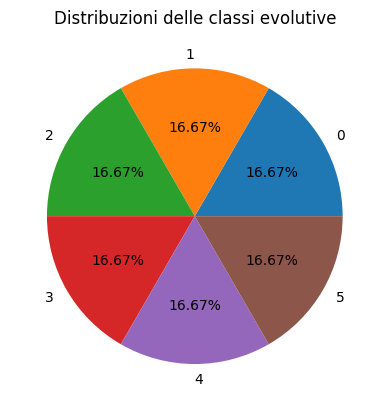

In [34]:
# Distrubuzione della variabile target
star_type = df.Type.unique()
type_counts = df.Type.value_counts()
display(type_counts)

# Diagramma a torta
fig, ax = plt.subplots()
ax.pie(type_counts.values, labels=star_type, autopct='%1.2f%%')
ax.set_title('Distribuzioni delle classi evolutive')
plt.show()

Il dataset appare perfettamente bilanciato, avendo la stessa quantità di record per ciascuna classe evolutiva delle stelle.

Volendo indagare le correlazioni tra le variabili, si esclude la variabile Color che è stata direttamente determinata attraverso la variabile Spectral_Class e che causerebbe collinearità.

La variabile Spectral_Class, invece, essendo categorica, necessita di un encoding che la renda numerica. L'encoding viene eseguito tenendo conto della [relazione](https://www.tuttee.co/blog/phys-color-and-brightness-of-stars-and-hr-diagram) esistente tra le classi spettrali, ovvero, in ordine di temperatura crescente: `O > B > A > F > G > K > M`

In [35]:
# Encoding della variabile categorica Spectral_Class,
# definito in modo tale da avere correlazione positiva con la temperatura

spectral_to_number = {
    'O': 6,
    'B': 5,
    'A': 4,
    'F': 3,
    'G': 2,
    'K': 1,
    'M': 0
}

df['Spectral_Class'] = df['Spectral_Class'].map(spectral_to_number)

<Axes: >

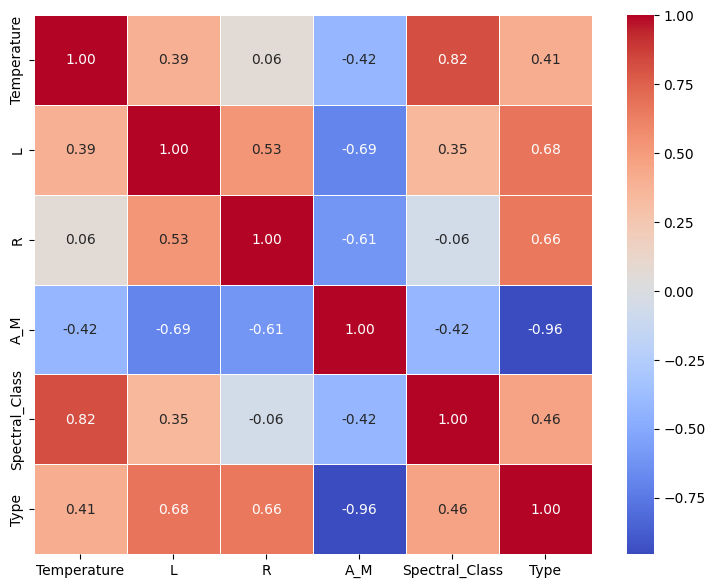

In [36]:
# Matrice di correlazione
correlation_matrix = df.drop(['Color'], axis=1).corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

Sulla base della matrice di correlazione delle variabili nel dataset si possono fare le seguenti osservazioni:
- come era logico aspettarsi, la correlazione più alta si registra tra `Temperature` e `Spectral-Class`, dal momento che la classe spettrale è definita in base alla temperatura.
- le variabili `L` e `A_M` sono altamente correlate; infatti, la magnitudine assoluta di una stella è direttamente collegata alla sua luminosità.
- le variabili più correlate con la variabile target `Type` sono `L`, `R` e `A_M` che sono sufficienti per determinare la classe evolutiva di una stella.

### **Preprocessing dei dati**

Il preprocessamento dei dati consiste in alcune fasi che rendono i dati adatti per i modelli di machine learning di classificazione; i passaggi sono:

- separazione delle features e della variabile target;
- standardizzazione delle features attraverso `StandardScaler()`: media nulla e deviazione standard 1;
- suddivisione dei dati nei set di training e testing con la stratificazione del target attraverso `train_test_split`; la stratificazione del target assicura che nei sottoinsiemi di training e testing ci siano campioni sufficienti per ogni classe.


In [45]:
# features = ['Temperature', 'L', 'R', 'A_M', 'Spectral_Class']
features = ['Temperature', 'L', 'R', 'Spectral_Class']
target = 'Type'

X = df[features]
y = df[target]

# Standardizzazione dei dati: media nulla e deviazione standard 1
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

print(f'Dati standardizzati')
print(f'X_std mean: {X_std.mean():.2f}')
print(f'X_std std : {X_std.std():.2f}')

# Train, test split
test_size = 0.20  # 80% train e 20% test
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size= test_size, random_state=123)

print(f'\nTrain shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Dati standardizzati
X_std mean: -0.00
X_std std : 1.00

Train shape: (192, 4)
Test shape: (48, 4)


Osservazione: si esclude la feature `A_M` perché ha un alto potere predittivo nei confronti del target e rende indistinguibile un confronto tra modelli diversi di classificazione. Nel caso in cui si volesse soltanto massimizzare l'accuratezza della classificazione senza fare alcun confronto tra modelli, allora inserire anche `A_M` porterebbe senz'altro a risultati ottimi.

### **Implementazione e valutazione dei modelli**

Dopo la definizione del modello di classificazione, per determinare gli iperparametri del modello che meglio si addicono al task proposto, si esegue una `GridSearchCV` (Cross-Validation) basata sull'`accuracy`.

Il metodo della cross-validation prevede la suddivisione del dataset in `n_splits` sottoinsiemi per addestrare il modello su `n_splits-1` sottoinsiemi e lasciare l'ultimo per il test del modello. Questo processo viene eseguito iterativamente riservando ogni volta un sottoinsieme diverso per testare il modello. I risultati finali tengono quindi conto di tutti i dati nel dataset e rappresentano le performance medie del modello su tutti i test eseguiti.

Per avere informazioni circa la bontà della classificazione e della capacità del modello di generalizzare su dati mai visti in fase di addestramento, è utile stampare un `classification_report` e visualizzare una `confusion_matrix`.

Le metriche prese in considerazione per valutare i modelli di classificazione in questo notebook sono:

- `accuracy`: frazione delle predizioni corrette rispetto al totale delle predizioni;
- `precision`: quanto sono affidabili le predizioni positive; un valore elevato indica pochi falsi positivi.
- `recall`: quanto il modello è in grado di classificare tutti i veri positivi; un valore elevato indica pochi falsi negativi.
- `f1-score`: media armonica tra precision e recall.

Tutte le definizioni degli iperparametri dei modelli sono prese da [scikit-learn](https://scikit-learn.org/stable/).

### Regressione Logistica

Iperparametri del modello `LogisticRegression`:

- `penalty`: specifica la norma della penalità: L1, L2 o entrambe (elasticnet);
- `C`: specifica l'entità della regolarizzazione;
- `solver`: algoritmo da utilizzare nell'ottimizzazione;
- `multi_class`: 'auto' seleziona 'ovr' se i dati sono binari, oppure se solver è 'liblinear', then a binary problem is fit for each label;
- `class_weight`: pesi associati alle classi; se selezionato None, tutte le classi sono considerate con peso unitario.

Migliori parametri della GridSearch: {'C': 1, 'multi_class': 'ovr', 'penalty': None, 'solver': 'newton-cholesky'}
Miglior accuracy media: 0.948

Logistic Regression, Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.44      1.00      0.62         4
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7

    accuracy                           0.90        48
   macro avg       0.91      0.92      0.88        48
weighted avg       0.95      0.90      0.90        48



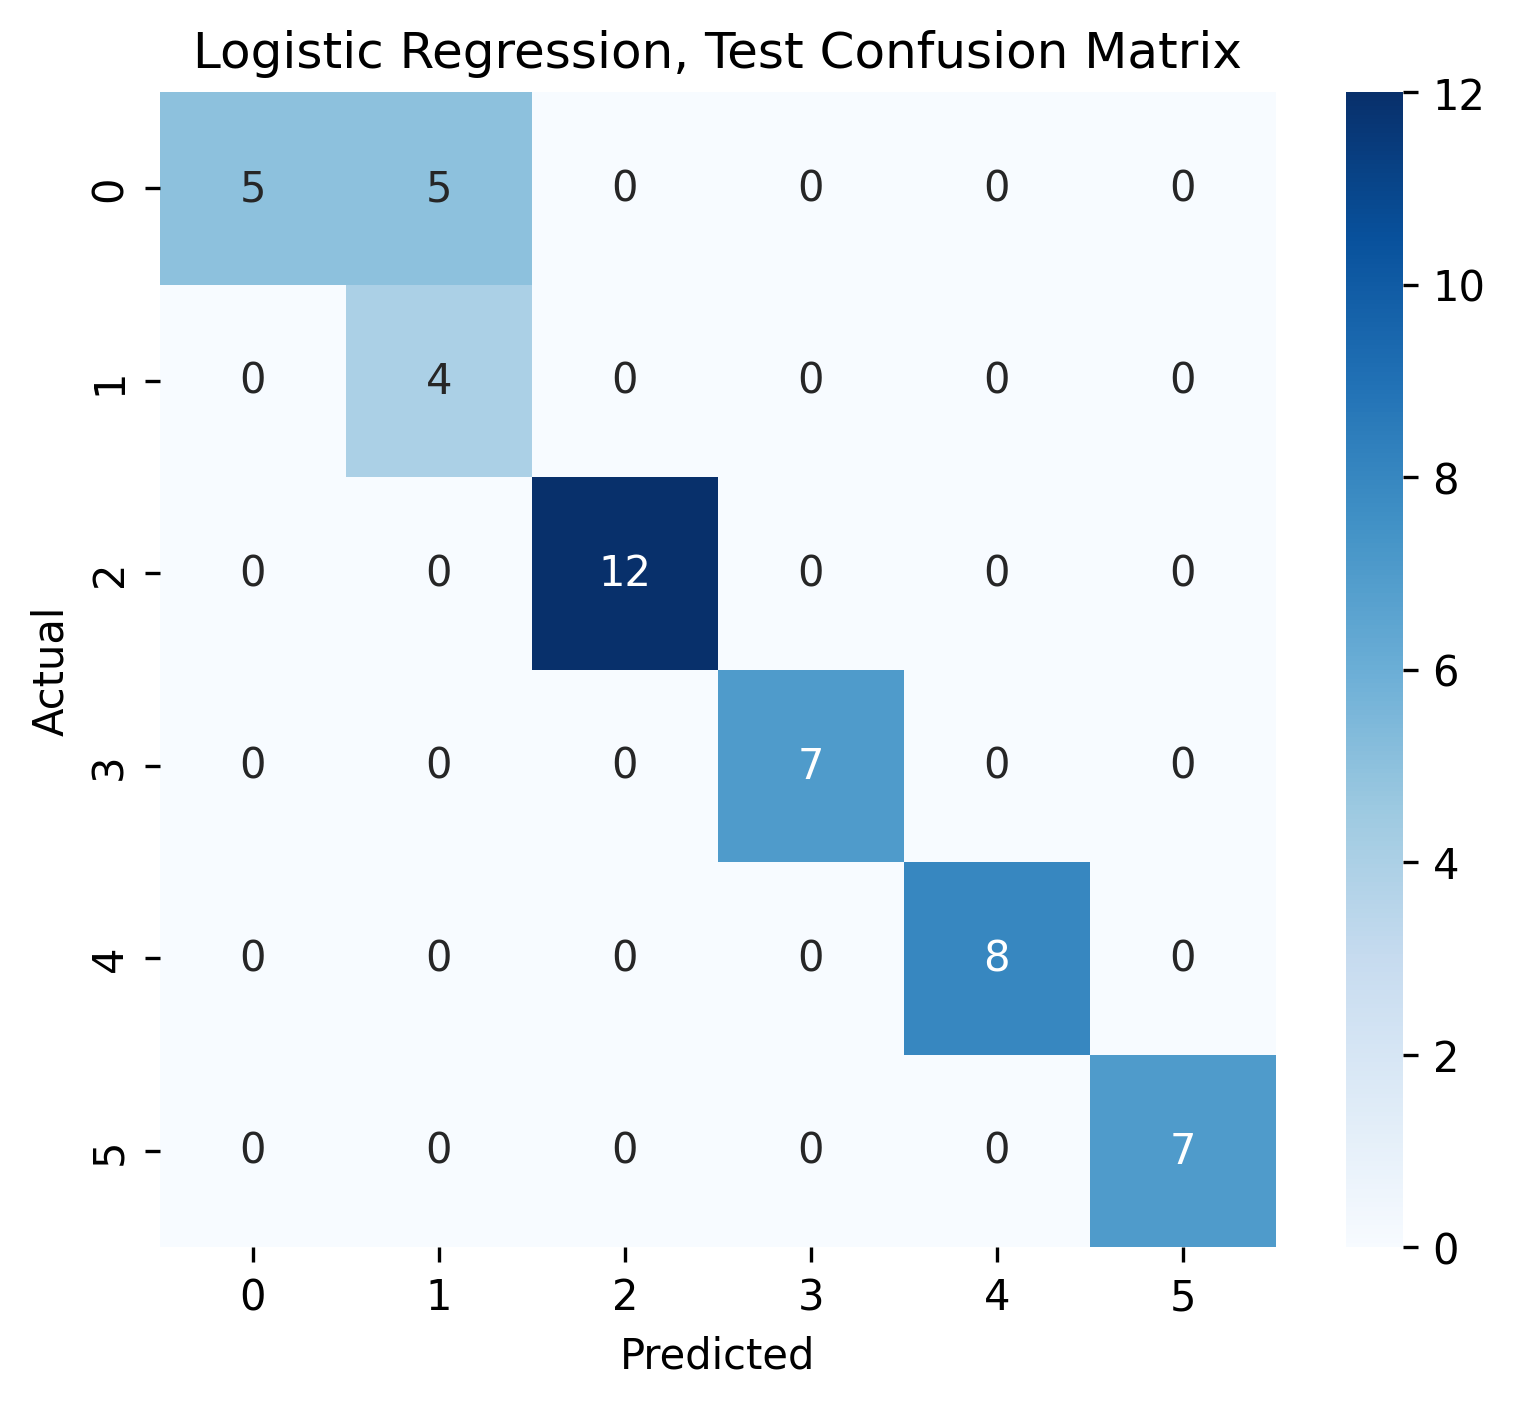

In [ ]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
              'C': list(range(1, 6)),
              'multi_class': ['auto', 'ovr', 'multinomial'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}  # valori da testare
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X_train, y_train)
print("Migliori parametri della GridSearch:", grid_search.best_params_)
print(f"Miglior accuracy media: {grid_search.best_score_:.3f}" )

# Best model definition
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print("\nLogistic Regression, Test Classification Report:")
classification_report_lr = classification_report(y_test, y_pred_lr)
print(classification_report_lr)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
# labels = ['0', '1', '2', '3', '4', '5']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='d' ) #, xticklabels=labels, yticklabels=labels)

plt.title('Logistic Regression, Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_lr.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_lr.png', height=500, width=500))

Dal report di classificazione si vede che le classi problematiche per il modello sono la 0 e la 1, che presentano due situazioni opposte:

- Classe 0: `precision = 1.00` indica che non ci sono falsi positivi, mentre `recall = 0.50` indica che metà delle predizioni sono falsi negativi.
- Classe 1:  `precision = 0.44` indica che ci sono molti falsi positivi, mentre `recall = 1.00` indica che non sono presenti falsi negativi.

I due risultati si influenzano a vicenda; infatti, i 5 falsi positivi registrati per la classe 1 sono i 5 falsi negativi registrati per la classe 0.

Le altre classi, invece, presentano una classificazione perfetta.

### Decision Tree Classifier

Iperparametri del modello `DecisionTreeClassifier`:
- `max_depth`: massima profondità dell'albero decisionale;
- `min_samples_split`: numero minimo di esempi necessari per dividere un nodo interno;
- `min_samples_leaf`: numero minimo di esempi per definire un leaf node;
- `criterion`: criterio che stima la bontà dello split;
- `class_weight`: pesi associati alle classi; se None, allora tutte le classi hanno lo stesso peso.


GridSearchCV best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best average accuracy: 0.958

Decision Tree Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7

    accuracy                           0.96        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.96      0.96      0.96        48



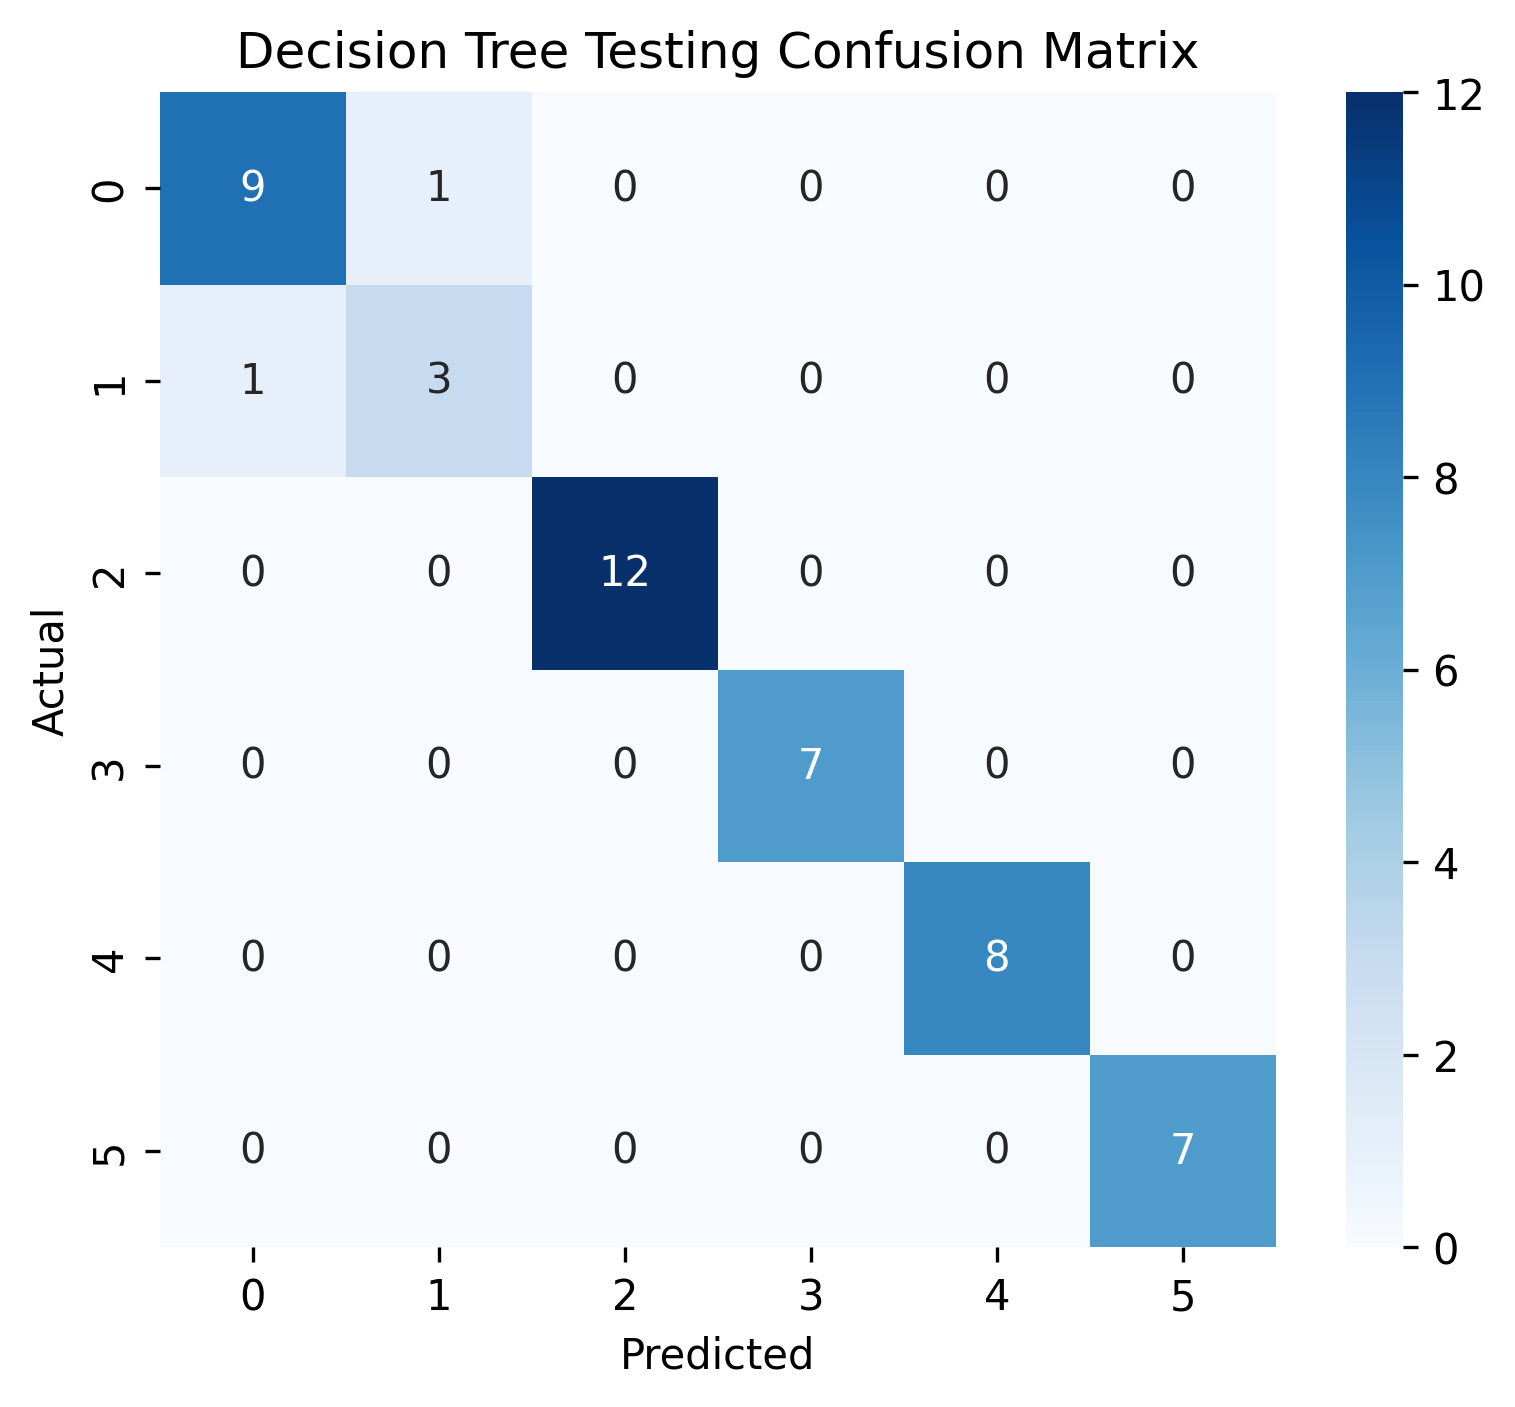

In [ ]:
param_grid = {'max_depth': list(range(1, 6)),
              'min_samples_split': list(range(1,6)),
              'min_samples_leaf': list(range(1,6))}  # values to be tested

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X_train, y_train)
print("GridSearchCV best parameters:", grid_search.best_params_)
print(f"Best average accuracy: {grid_search.best_score_:.3f}" )

# Best model definition
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("\nDecision Tree Testing Data Classification Report:")
classification_report_dt = classification_report(y_test, y_pred_dt)
print(classification_report_dt)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='d')  # , xticklabels=labels, yticklabels=labels)

plt.title('Decision Tree Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_dt.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_dt.png', height=500, width=500))

Il Decision Tree Classifier migliora le prestazioni generali del modello, come si può vedere confrontando gli f1-score con il caso della Regressione Logistica.
Tuttavia, la classificazione soffre ancora per le classi 0 e 1.

### Random Forest Classifier

Iperparametri del modello `RandomForestClassifier`:
- `n_estimators`: numero di alberi nella foresta;
- `max_depth`: profondità massima del singolo albero decisionale; se None, l'abero cresce finché tutte le foglie sono pure oppure finché ciascuna foglia contiene un numero min_samples_split di esempi.

- `min_samples_split`: numero minimo di esempi per dividere una foglia.

- `min_samples_leaf`: numero minimo di esempi per avere un leaf node;

- `criterion`: funzione per stimare la bontà dello split;

- `class_weight`: pesi associati alle classi; se None, tutte le classi hanno lo stesso peso.

GridSearch best parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best average accuracy: 0.969

Random Forest Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7

    accuracy                           0.98        48
   macro avg       0.97      0.98      0.97        48
weighted avg       0.98      0.98      0.98        48



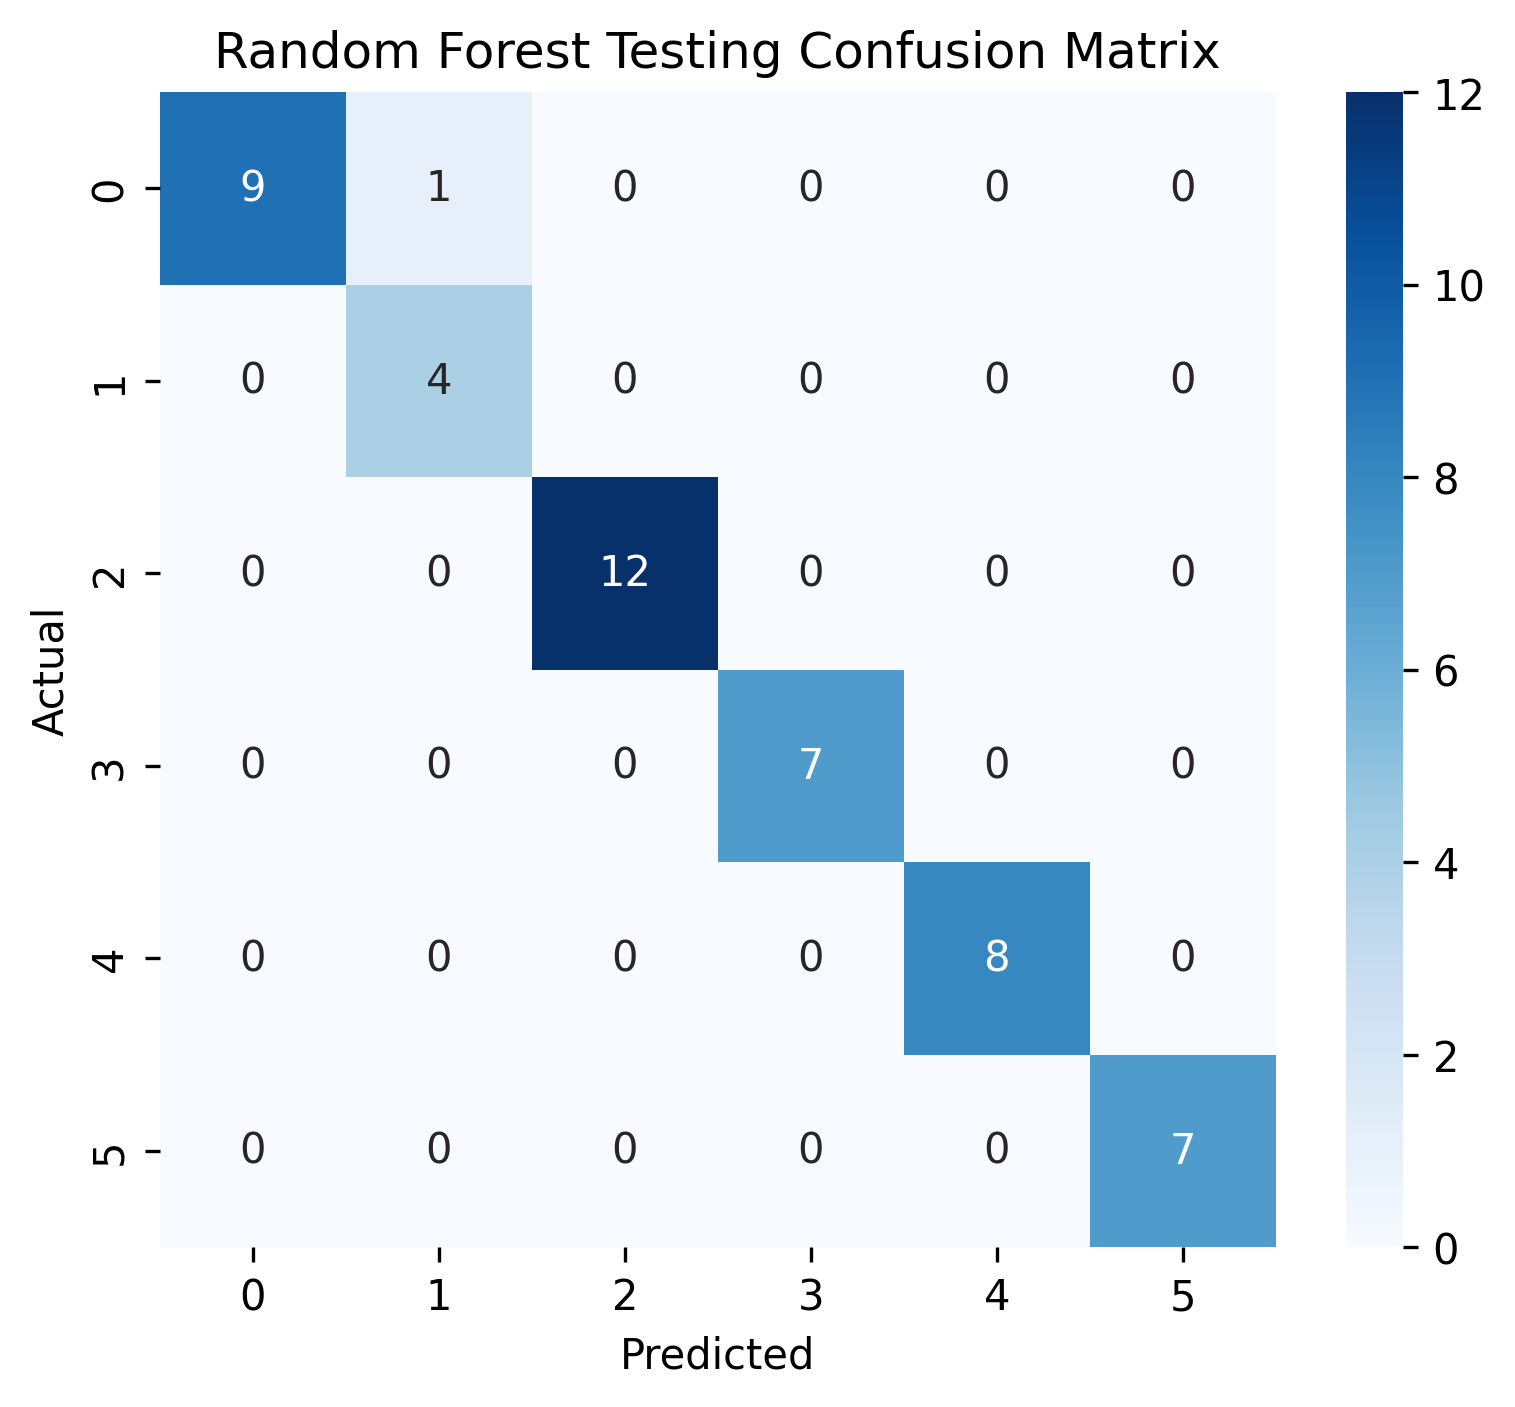

In [ ]:
param_grid = {'n_estimators': [None, 150, 200, 300],
              'max_depth': list(range(1, 6)),
              'min_samples_split': [1, 2, 4],
              'min_samples_leaf': [1, 2, 4]}  # values to be tested
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(RandomForestClassifier(criterion='entropy', class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X_train, y_train)
print("GridSearch best parameters:", grid_search.best_params_)
print(f"Best average accuracy: {grid_search.best_score_:.3f}" )

# Best model definition
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest Testing Data Classification Report:")
classification_report_rf = classification_report(y_test, y_pred_rf)
print(classification_report_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d')  #,xticklabels=labels, yticklabels=labels)

plt.title('Random Forest Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_rf.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_rf.png', height=500, width=500))

Con la Random Forest si ottengono le performance migliori sul dataset; infatti, si registra un solo esempio mal classificato per la classe 0, andando a risolvere i problemi di classificazione registrati per i modelli precedenti.

## **Diagramma Hertzsprung-Russell**

Il diagramma H-R mette in relazione la luminosità delle stelle con la loro temperatura. Osservando il grafico si nota che le stelle non sono disposte in maniera casuale, ma si dispongono generando delle zone con densità diverse, tenendo conto del fatto che le stelle più calde irraggiano maggiormente rispetto alle stelle più fredde, e di conseguenza raggiungono luminosità maggiori.

- Le Super Giants e Hyper Giants sono stelle con temperatura molto varia e con una luminosità elevatissima a motivo delle loro dimensioni imponenti.
- Le White Dwarf, invece, anche se possono raggiungere temperature mediamente elevate, hanno una scarsa luminosità a causa delle loro dimensioni ridotte.
- Le Red Dwarf e Brown Dwarf, similmente, hanno temperatura e luminosità tra le più basse.
- Le stelle della Main Sequence, invece, presentano una forte relazione tra temperatura e luminosità, e si dispongono quasi in linea trasversale sul grafico.

Il Sole, come si può vedere, appartiene alla Main Squence; infatti, ha una temperatura di circa $T = 5772\,K$ e una luminosità relativa $L/L_{\odot}=1$.


Il diagramma H-R consente di studiare l'evoluzione stellare e di capire quali fasi attraverserà una stella nella sua vita. Le stelle nella Main Sequence sono le più stabili, mentre le White Dwarf e le Super Giants o Hyper Giants rappresentano classi evolutive finali di stelle che si trovavano originariamente nella Main Sequence.

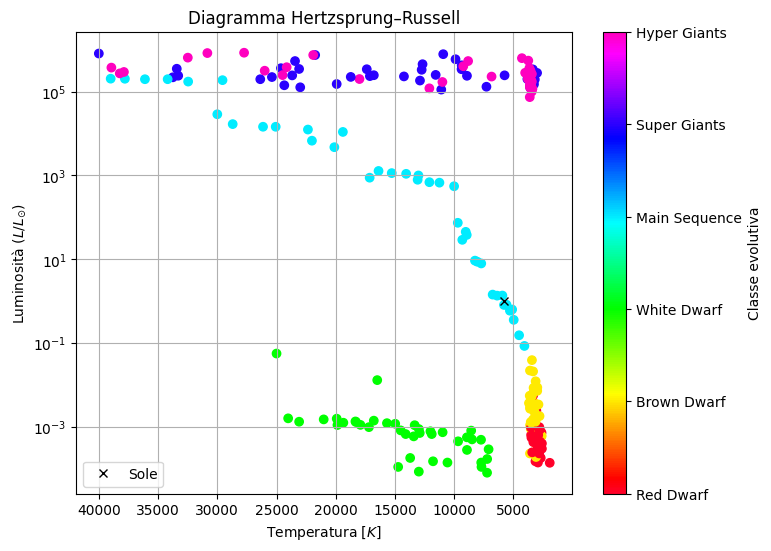

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Temperature'], df['L'], c=df['Type'], cmap='gist_rainbow')
plt.gca().invert_xaxis()  # le stelle calde a sinistra
plt.yscale('log')
cbar = plt.colorbar(scatter, label='Classe evolutiva')
cbar.set_ticklabels(['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants'])
plt.xlabel(r'Temperatura $[K]$')
plt.ylabel(r'Luminosità $(L/L_{\odot})$')
plt.title('Diagramma Hertzsprung–Russell')
plt.grid()

plt.plot(5772, 1, color='k', marker='x', label='Sole', linestyle='None')
plt.legend()
plt.show()

## **Legge di Stefan-Boltzmann**

Si può dimostrare che le stelle appartenti alla `Main Sequence` seguono una correlazione fra temperatura e luminosità relativa secondo una legge di potenza che è la legge della radiazione di corpo nero (Stefan-Boltzmann): $L = σ \cdot 4π R^2 T^4$.

La relazione $L \propto R^2 T^4$ si può trasformare in una relazione lineare $y = a + bx$ considerando $x = log(R^2T^4)$ e $y = log(L)$, e attraverso una regressione lineare semplice (`LinearRegression()`) si possono stimare i coefficienti della relazione lineare.

Per valutare la bontà della regressione lineare semplice si tiene conto delle seguenti metriche:
- `MAE`: Mean Absolute Error, errore medio assoluto tra le previsioni e i valori reali;
- `MSE`: Mean Squared Error, errore quadratico medio tra le previsioni e i valori reali, penalizza maggiormente gli errori grandi;
- `RMSE`: Root Mean Squared Error, radice quadrata della MSE che fornisce una misura dell’errore medio nella stessa unità della variabile target;
- `R^2 score`: coefficiente di determinazione,  misura quanta varianza del target è spiegata dal modello.

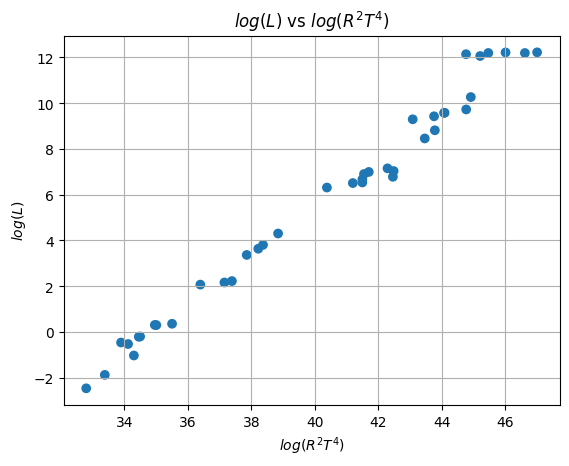

In [ ]:
# Selezione delle sole stelle appartententi alla classe 3 (Main Sequence)
main_sequence_stars = df.loc[df.Type==3]
mss = main_sequence_stars  # rinominazione

# Creazione della variabile continua R^2 * T^4
mss['R2T4'] = (mss.R)**2 * (mss.Temperature)**4

# Scatter plot di log(L) in funzione di log(R^2 * T^4)
plt.scatter(np.log(mss.R2T4), np.log(mss.L) , marker='o', linestyle='')
plt.ylabel(r'$log(L)$')
plt.xlabel(r'$log(R^2 T^4)$')
plt.title(r'$log(L)$ vs $log(R^2 T^4)$')
plt.grid()

#### Regressione Lineare Semplice per la stima dei coefficienti

Esempi nel train set: 28
Esempi nel test set: 12 

Coefficiente b: 1.066
Intercetta a: -37.222


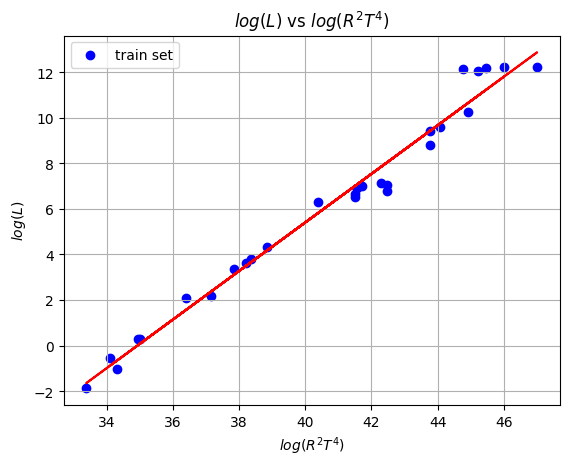

In [ ]:
X = mss.R2T4.to_numpy()  # variabile indipendente
y = mss.L.to_numpy()  # target continuo

# Suddivisione dei dati nel train-set e test-set
X_train, X_test, y_train, y_test = train_test_split(np.log(X), np.log(y), test_size=0.30, random_state=42, shuffle=True)

print(f'Esempi nel train set: {np.shape(X_train)[0]}')
print(f'Esempi nel test set: {np.shape(X_test)[0]} \n')


# Definizione del modello di regressione lineare semplice
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)  # reshape per avere (n_osservazioni, n_features)

# Coefficienti della regressione lineare
print (f'Coefficiente b: {regressor.coef_[0]:.3f}')
print (f'Intercetta a: {regressor.intercept_:.3f}')

# Visualizzazione della regressione sul train set
plt.scatter(X_train, y_train,  color='blue', label='train set')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.ylabel(r'$log(L)$')
plt.xlabel(r'$log(R^2 T^4)$')
plt.title(r'$log(L)$ vs $log(R^2 T^4)$')
plt.grid()
plt.legend()

Mean absolute error: 0.39
Mean squared error: 0.19
Root mean squared error: 0.44
R2-score: 0.99


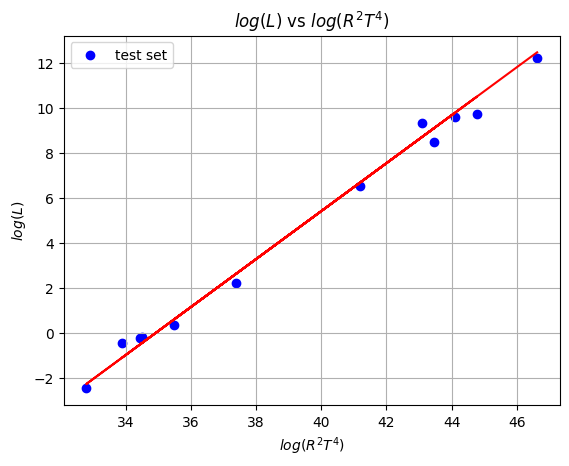

In [ ]:
# Predizioni sul test set
y_test_ = regressor.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

plt.scatter(X_test, y_test,  color='blue', label='test set')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.ylabel(r'$log(L)$')
plt.xlabel(r'$log(R^2 T^4)$')
plt.title(r'$log(L)$ vs $log(R^2 T^4)$')
plt.grid()
plt.legend()

**Osservazioni**

Sulla base delle metriche stimate, si può concludere che:
- $MAE \approx 0.4$ in scala logaritmica, significa che il modello sbaglia la luminosità mediamente di un fattore $10^{0.4} \approx 2.5$.
- $RMSE = 0.44$ essendo simile alla $MAE$ indica che non sono presenti outlier gravi nei dati.
- $R^2 = 0.99$ indica che il modello spiega il 99% della varianza del target.

Il valore del coefficiente angolare $b \approx 1$ conferma sperimentalmente che la relazione tra luminosità relativa, raggio relativo e temperatura delle stelle nel dataset è ben descritta dalla legge di Stefan-Boltzmann. La piccola deviazione può essere attribuita a rumore osservativo, semplificazioni nel modello, al numero limitato di dati e alla mancanza di incertezze nei dati.

In conclusione, i risultati mostrano che la legge è rispettata per le stelle di sequenza principale, confermando che il dataset è coerente con le leggi dell’astrofisica stellare.



## **Temperature medie delle classi spettrali**

In [15]:
# Calcolo della temperatura media per ogni classe spettrale

spectral_classes = df.Spectral_Class.unique()

spectral_class_temp = []
for spectral_class in spectral_classes:
  df_spectral_class = df.loc[df.Spectral_Class==spectral_class]
  avg_spectral_temp = df_spectral_class.Temperature.mean()
  spectral_class_temp.append( [spectral_class, np.round(avg_spectral_temp,1)] )

# Ordina in base alla temperatura (secondo elemento)
spectral_class_temp = sorted(spectral_class_temp, key=lambda x: x[1])
df_spectral_temp = pd.DataFrame(spectral_class_temp, columns=['Spectral Class', 'Average Temperature [K]'])
df_spectral_temp

,Spectral Class,Average Temperature [K]
0,0,3257.3
1,1,4499.5
2,2,6850.0
3,3,8516.8
4,4,9842.4
5,5,19574.5
6,6,22294.1


Text(0.5, 1.0, 'Temperatura delle classi spettrali')

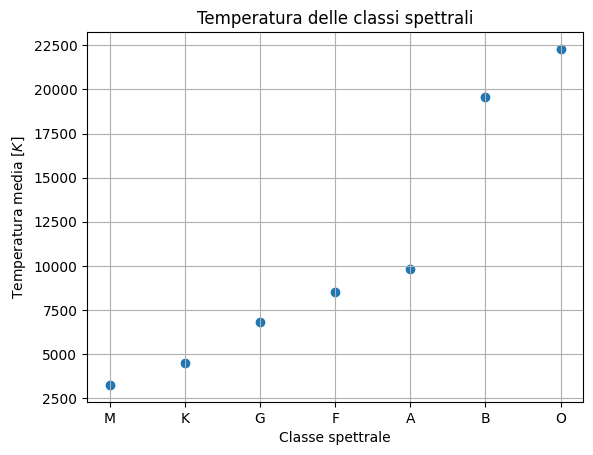

In [21]:
plt.scatter(df_spectral_temp.index, df_spectral_temp['Average Temperature [K]'], marker='o')
plt.grid()
sorted_classes = df_spectral_temp['Spectral Class'].to_numpy()
plt.xticks(df_spectral_temp.index, sorted_classes)
plt.xlabel('Classe spettrale')
plt.xticks(df_spectral_temp.index, ['M', 'K', 'G', 'F', 'A', 'B', 'O'])
plt.ylabel(r'Temperatura media $[K]$')
plt.title('Temperatura delle classi spettrali')

In termini di temperatura media, la relazione `O > B > A > F > G > K > M` è correttamente verificata dalle stelle nel dataset.

## **Raggio medio delle stelle in ciascuna classe evolutiva**

In [39]:
# Mapping delle classi evolutive

Type_to_Class = {
    0 : 'Red Dwarf',
    1 : 'Brown Dwarf',
    2 : 'White Dwarf',
    3 : 'Main Sequence',
    4 : 'Super Giants',
    5 : 'Hyper Giants',
}

df['Type'] = df['Type'].map(Type_to_Class)

In [42]:
# Calcolo del raggio medio per ogni classe evolutiva

evolutive_classes = df.Type.unique()

evolutive_class_radius = []
for evolutive_class in evolutive_classes:
  df_evolutive_class = df.loc[df.Type==evolutive_class]
  avg_evolutive_radius = df_evolutive_class.R.mean()
  avg_evolutive_temp = df_evolutive_class.Temperature.mean()
  evolutive_class_radius.append( [evolutive_class, np.round(avg_evolutive_radius,3), np.round(avg_evolutive_temp,1)] )

# Ordina in base al raggio (secondo elemento)
evolutive_class_radius = sorted(evolutive_class_radius, key=lambda x: x[1])
df_evolutive_radius = pd.DataFrame(evolutive_class_radius, columns=['Type', 'Average Radius', 'Average Temperature [K]'])
df_evolutive_radius

,Type,Average Radius,Average Temperature [K]
0,White Dwarf,0.011,13931.4
1,Red Dwarf,0.110,2998.0
2,Brown Dwarf,0.348,3283.8
3,Main Sequence,4.430,16018.0
4,Super Giants,51.150,15347.8
5,Hyper Giants,1366.898,11405.7
